In [1]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pyplot as plt
import umap.umap_ as umap
from sklearn.datasets import make_blobs
import numpy as np
%matplotlib inline
import scipy
import time
import networkx as nx
import collections
from collections import defaultdict
import random
import pandas as pd
import statistics

from models_updated import *
import networkx as nx

import random

sns.set(style='white', context='poster', rc={'figure.figsize':(8,6)})
#default_seed = 16


In [2]:
import pickle

In [3]:
def ipfnA_random(deg, nodes):
    
    G1    = nx.random_regular_graph(d=deg, n=nodes)
    #G_normal     = custom_exponential_graph(baseGraph, scale=100)
    return G1

In [4]:
def ipfnA_barabasi(deg, nodes):
    
    G2   = nx.generators.random_graphs.barabasi_albert_graph(m=deg,n=nodes)
    #G_normal     = custom_exponential_graph(baseGraph, scale=100)
    return G2

In [5]:
input_list_random_2000 = []
input_list_barabasi_2000 = []

for i in range(20,26,1):
        input_list_random_2000.append((i,2000))
        
for i in range(10,15,1):
        input_list_barabasi_2000.append((i,2000))
        
graph_list_random_2000 = []
graph_list_barabasi_2000 = []

for i in input_list_random_2000:
    graph1 = ipfnA_random(*i)
    graph_list_random_2000.append(graph1)
    
for j in input_list_barabasi_2000:
    graph2 = ipfnA_barabasi(*j)
    graph_list_barabasi_2000.append(graph2)
    
data1 = graph_list_random_2000
data2 = graph_list_barabasi_2000

# with open('graph_list_random_2000.pkl', 'wb') as outfile:
#     pickle.dump(data1, outfile, pickle.HIGHEST_PROTOCOL)
    
# with open('graph_list_barabasi_2000.pkl', 'wb') as outfile:
#     pickle.dump(data2, outfile, pickle.HIGHEST_PROTOCOL)

In [6]:
for i in graph_list_barabasi_2000:
    print(i.number_of_edges())

19900
21879
23856
25831
27804


In [7]:
for i in graph_list_random_2000:
    print(i.number_of_edges())

20000
21000
22000
23000
24000
25000


#### 50k nodes:

In [8]:
input_list_random_50k = []
input_list_barabasi_50k = []

for i in range(20,26,1):
        input_list_random_50k.append((i,50000))
        
for i in range(10,15,1):
        input_list_barabasi_50k.append((i,50000))
        
graph_list_random_50k = []
graph_list_barabasi_50k = []

for i in input_list_random_50k:
    graph1 = ipfnA_random(*i)
    graph_list_random_50k.append(graph1)
    
for j in input_list_barabasi_50k:
    graph2 = ipfnA_barabasi(*j)
    graph_list_barabasi_50k.append(graph2)
    
data01 = graph_list_random_50k
data02 = graph_list_barabasi_50k

# with open('graph_list_random_50k.pkl', 'wb') as outfile:
#     pickle.dump(data01, outfile, pickle.HIGHEST_PROTOCOL)
    
# with open('graph_list_barabasi_50k.pkl', 'wb') as outfile:
#     pickle.dump(data02, outfile, pickle.HIGHEST_PROTOCOL)

In [9]:
for i in graph_list_barabasi_50k:
    print(i.number_of_edges())

499900
549879
599856
649831
699804


In [10]:
for i in graph_list_random_50k:
    print(i.number_of_edges())

500000
525000
550000
575000
600000
625000


In [11]:
def ipfnB(G1,s):
#s = no of points
    SIGMA  = 1/5.2
    GAMMA  = 1/10
    MU_I   = 0.002

    R0     = 2.5
    BETA   = 1/(1/GAMMA) * R0
    BETA_Q = 0.5*BETA

    P      = 0.2
    Q      = 0.05
    
    model_base = SEIRSNetworkModel(G       = G1, 
                          beta    = BETA, 
                          sigma   = SIGMA, 
                          gamma   = GAMMA, 
                          initE = s*0.30, initI = s*0.1)
    
    model_base.run(T=300)
    fig,axs = model_base.figure_basic(ylim=0.75,xlim=100)
    
    line = axs.lines[1]
    p = line.get_data()
    p0 = p[0].compressed()
    p1 = p[1].compressed()
    #Maximum
    m = max(p[1])
    #Days Max
    ind= numpy.argmax(p[1])
    d = p[0][numpy.argmax(p[1])]
    #Mean and St Deviation
    mean  = statistics.mean(p1)
    stdev =  statistics.stdev(p1)
    line1 = axs.lines[2]
    w = line1.get_data()
    #Total Infections
    tot = 1 -(w[1][w[1].shape[0]-1])
    tp = 0.1*m
    np = 0.9*m
    #Ten Percent
    tpl =[]
    for i in range(len(p1)):
        x = numpy.abs(p1[i]-tp)
        if(x<0.001):
            #print(p1[i],x,p0[i])
            tpl.append(p0[i])
    tplval = statistics.mean(tpl)
    
    #Ninety Percent
    nplfh =[]
    nplsh = []
    for i in range(ind):
        x = numpy.abs(p1[i]-np)
        if(x<0.001):
            #print(p1[i],x,p0[i])
            nplfh.append(p0[i])
    for i in range(ind, len(p1)):
        x = numpy.abs(p1[i]-np)
        if(x<0.001):
            #print(p1[i],x,p0[i])
            nplsh.append(p0[i])
    npl=[(statistics.mean(nplfh)),(statistics.mean(nplsh))]
    
    P = model_base.X
    cluster2 = P[1000:]
    count =0
    for i in cluster2:
        if(i==4):
            count = count+1
            
    lday = p0[(len(p0)-1)]
    
    
    return m,d,tot,tplval,npl, mean, stdev,count,lday



#### 2k nodes

In [12]:
with open('graph_list_random_2000.pkl', 'rb') as infile:
    gl_random = pickle.load(infile)

with open('graph_list_barabasi_2000.pkl', 'rb') as infile:
    gl_barabasi = pickle.load(infile)

t = 0.00
t = 10.00
t = 20.00
t = 30.05
t = 40.03
t = 50.00
t = 60.10
t = 70.08
t = 80.84
t = 90.10
t = 100.76


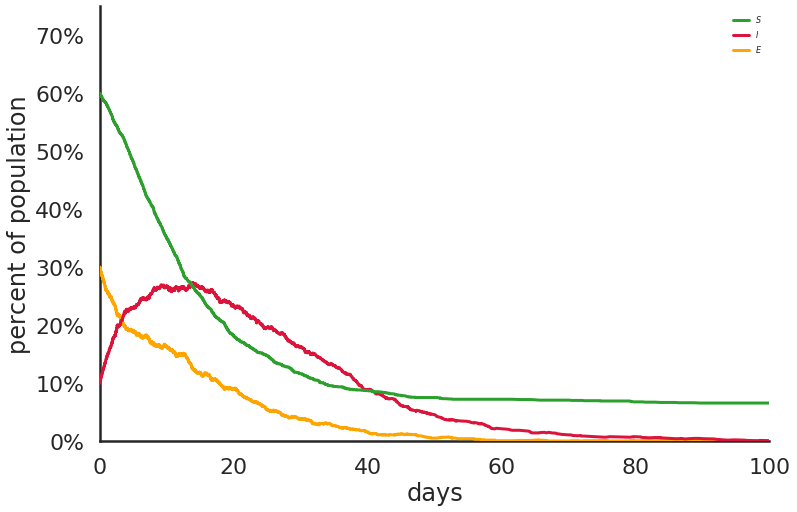

0.274 13.887410361781535 0.9345 57.71010684652417 [6.79687648436401, 17.675699568722358] 0.20511178641198177 0.06622844225238876 890 124.14997478464394
t = 0.01
t = 10.00
t = 20.01
t = 30.02
t = 40.01
t = 50.09
t = 60.11


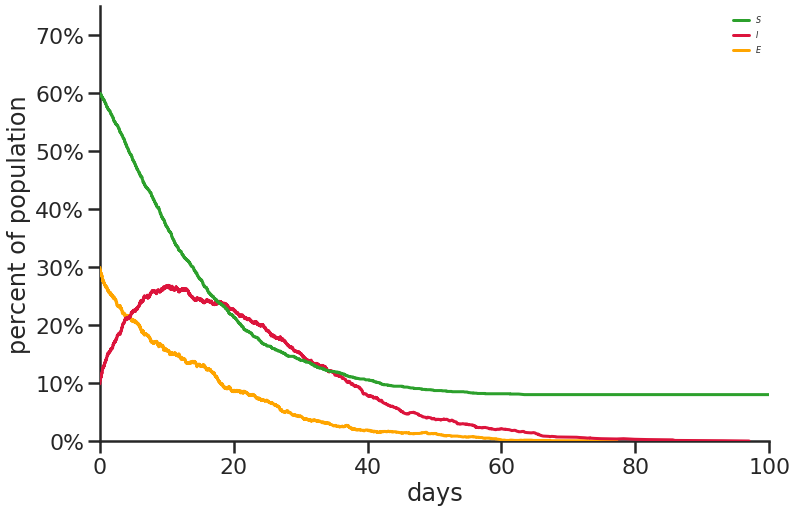

0.269 10.233603208542055 0.9195 55.89730525342766 [6.313348125253256, 15.720938305015606] 0.19560106265220278 0.06628102180743556 866 96.99295858231686
t = 0.01
t = 10.00
t = 20.01
t = 30.00
t = 40.00
t = 50.06
t = 60.13
t = 70.01
t = 100.86


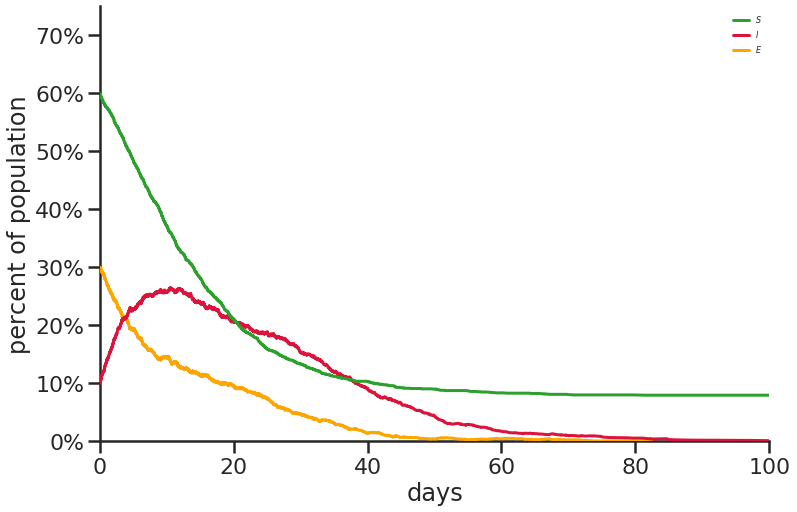

0.2655 10.55748451212006 0.9205 56.0973633385829 [5.998410700534887, 15.10551541255707] 0.19396506743311961 0.0627578660604924 868 104.80789685924194
t = 0.02
t = 10.00
t = 20.00
t = 30.02
t = 40.06
t = 50.13
t = 60.18
t = 70.58
t = 90.19


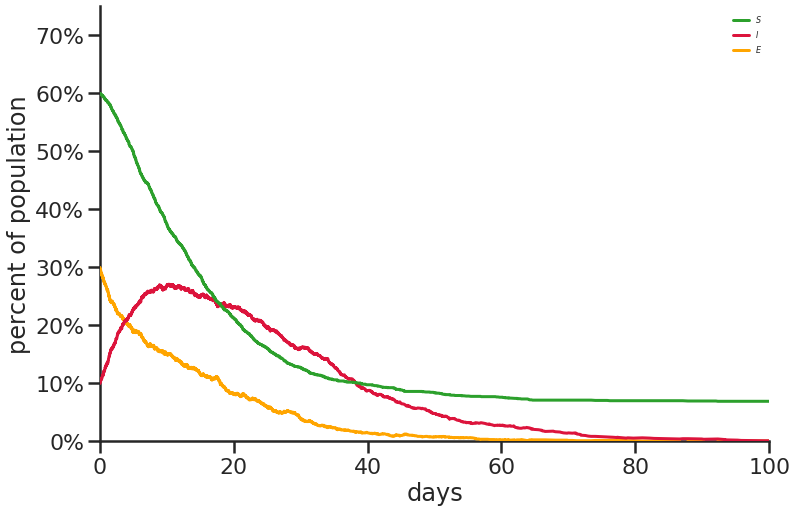

0.271 10.33664693675363 0.9315 60.12361593187573 [6.158461644834503, 16.982232322250344] 0.20020701677925473 0.06661930768559682 885 133.96110546733533
t = 0.00
t = 10.00
t = 20.02
t = 30.03
t = 40.04
t = 50.03
t = 60.45
t = 70.16
t = 80.17
t = 100.17


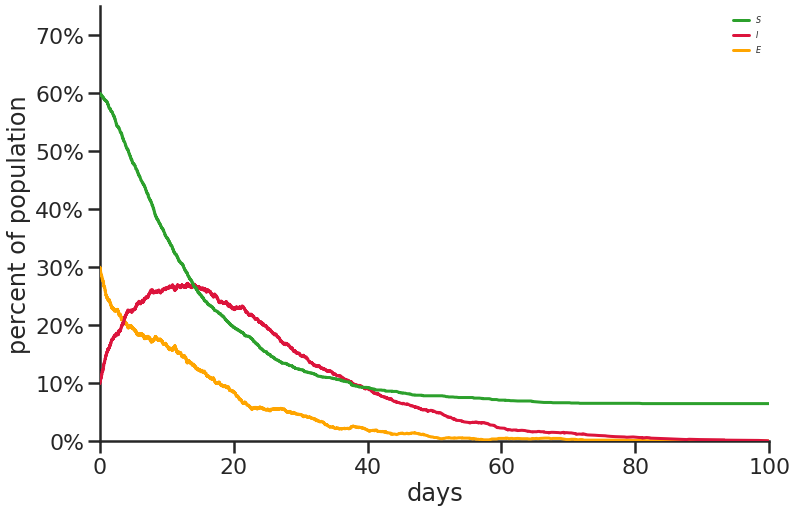

0.2725 13.140219623969642 0.9355 58.705376215295274 [6.708094776711833, 17.64419160847719] 0.20082018209408195 0.06867949920008494 894 117.61739217716163
t = 0.00
t = 10.01
t = 20.01
t = 30.03
t = 40.01
t = 50.01
t = 60.39
t = 90.59


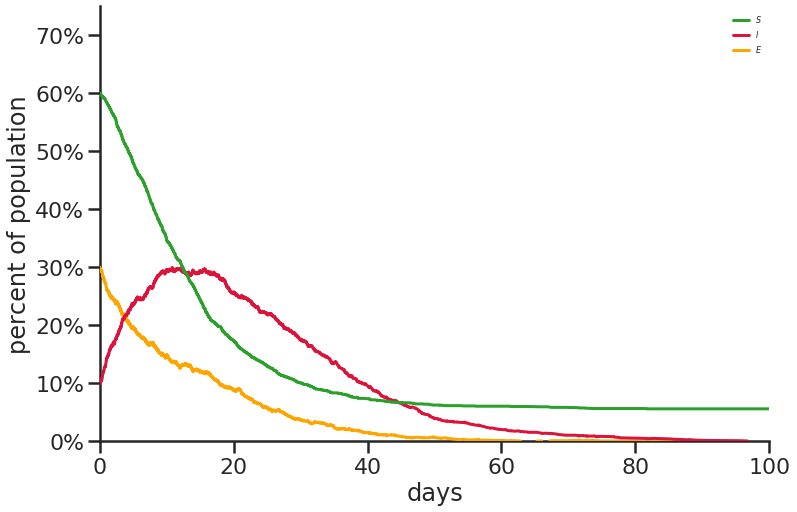

0.2995 10.839118241189656 0.944 55.3829236797569 [8.046207581512228, 18.887670705944615] 0.2216945754716981 0.07336352772202095 905 96.79957502410477


In [14]:
for i in gl_random:

    y,x,t,tp,npl,avg,stdv,count,lday = ipfnB(i,2000)

    print(y,x,t,tp,npl,avg,stdv,count,lday)

t = 0.01
t = 10.01
t = 20.01
t = 30.04
t = 40.02
t = 50.13
t = 70.29
t = 80.31


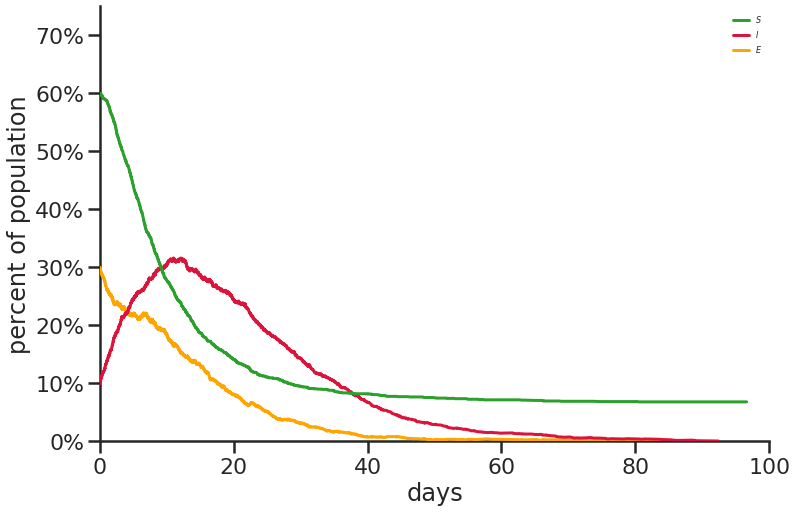

0.316 10.991148221691509 0.9319999999999999 48.60948780697897 [7.9830910084723, 15.129710790812728] 0.22442824477351916 0.0773345918699051 890 92.38381256691423
t = 0.01
t = 10.00
t = 20.00
t = 30.03
t = 40.07
t = 50.07
t = 60.25
t = 70.00
t = 80.59
t = 90.29
t = 100.69


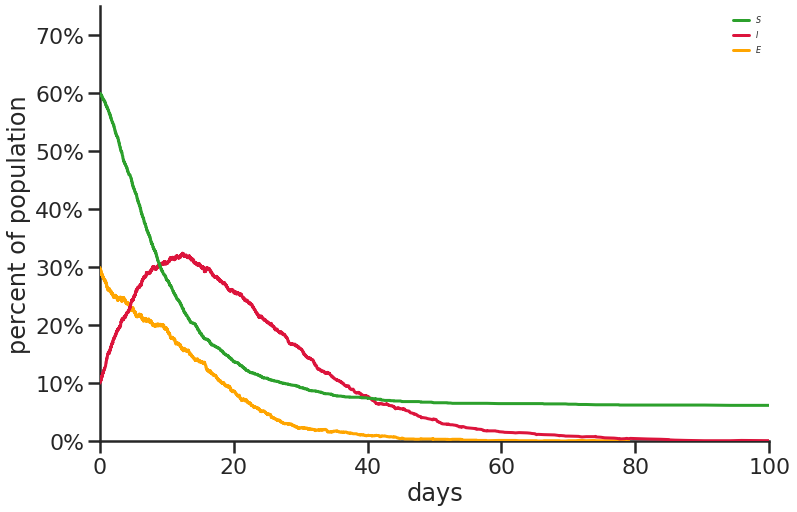

0.3245 12.362236144881711 0.9385 50.8410921281689 [7.474240457212804, 16.340079244334696] 0.23173234722522135 0.07972618772766284 897 108.64349496209093
t = 0.00
t = 10.01
t = 20.00
t = 30.06
t = 40.03
t = 50.01
t = 60.59
t = 70.01
t = 80.90


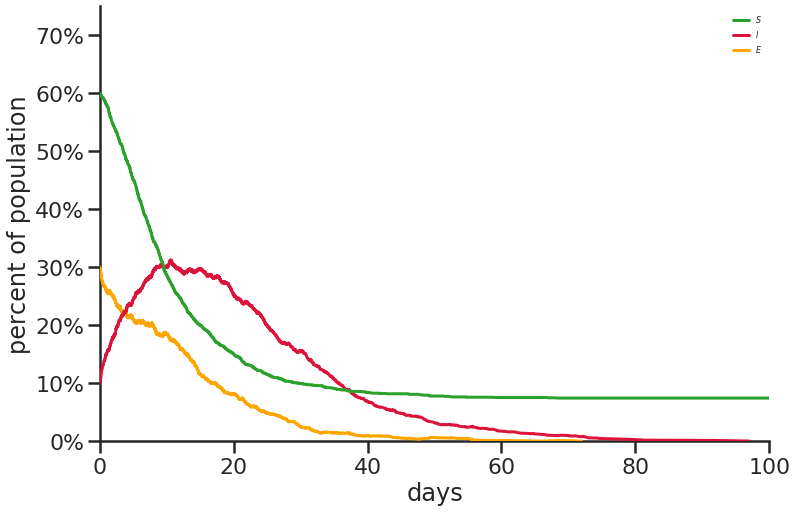

0.3125 10.526463441599505 0.9255 50.25135609212429 [7.219919978221429, 17.297109795219484] 0.22881880079068745 0.0751188133448147 870 96.9869493341993
t = 0.00
t = 10.01
t = 20.01
t = 30.02
t = 40.13
t = 50.06
t = 60.24
t = 70.31


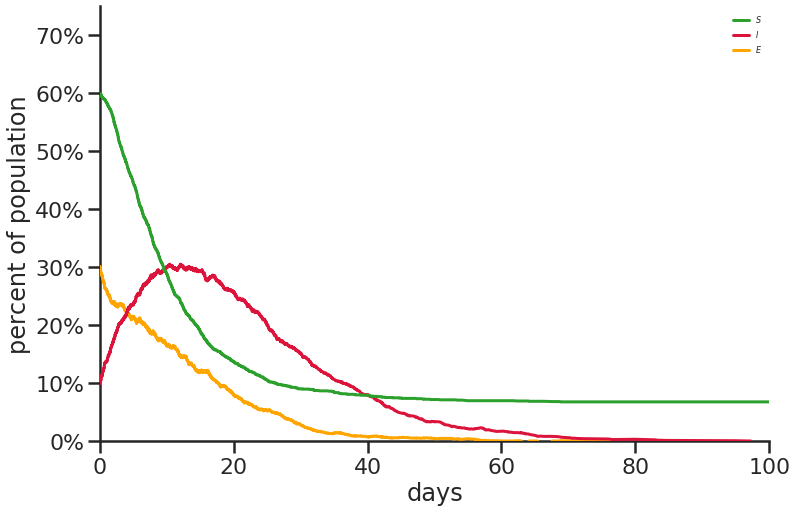

0.3055 10.472101563435317 0.9319999999999999 51.23202006639916 [7.150748590262387, 17.87025128586795] 0.22609364111498256 0.07437424239395746 887 97.24816594358481
t = 0.01
t = 10.00
t = 20.01
t = 30.02
t = 40.04
t = 50.06
t = 60.00
t = 80.09


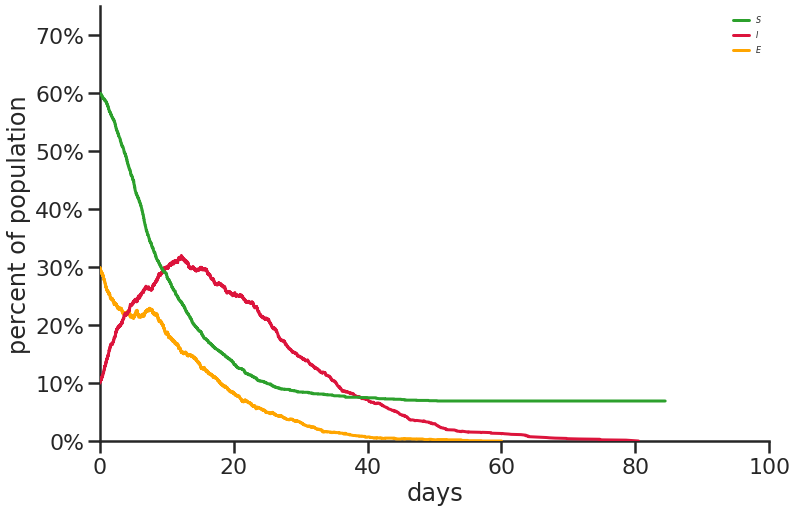

0.32 12.17966022465945 0.9305 49.385657731400144 [9.007009746380142, 16.261759318834496] 0.22836340824787257 0.0728691979624444 881 80.4755537145051


In [15]:
for i in gl_barabasi:

    y,x,t,tp,npl,avg,stdv,count,lday = ipfnB(i,2000)

    print(y,x,t,tp,npl,avg,stdv,count,lday)